# Exemplo Prático: Aprendizagem Supervisionada Regressão

## Predição de valor de imóvel para a cidade de Boston

O objetivo nessa prática é apresentar um passo a passo para aplicação da técina de regressão.

<div>
<img src="https://miro.medium.com/max/1536/1*5stVxlz6EgnpqWarZvghoA.png", width="640"/>
<div/>

# 1) Obtenção dos Dados

Carregando as bibliotecas essenciais e os dataset


In [ ]:
# bibliotecas numéricas numpy, pandas e para plot matplotlib e seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

In [ ]:

boston_dataset = pd.read_fwf('housing.csv', header=None)

O que é um dataset do scikit-learn?

Objeto e seu atributos

In [ ]:
# descrevendo os objetos
print('nomes de atributos', '\n\n')
print('Descrição', '\n\n')
print('dados', '\n\n')
print('target', '\n\n')
print('nome do arquivo', '\n\n')

nomes de atributos 


Descrição 


dados 


target 


nome do arquivo 




In [ ]:
boston_dataset.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# descrevendo os objetos
print('nomes de atributos', boston_dataset.feature_names, '\n\n')
print('Descrição', boston_dataset.DESCR, '\n\n')
print('dados', boston_dataset.data, '\n\n')
print('target', boston_dataset.target, '\n\n')
print('nome do arquivo', boston_dataset.filename, '\n\n')

O que representam essas trezes colunas + target:


- **CRIM**: Taxa de criminalidade per capita por cidade
- **ZN**: Proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados
- **INDUS**: Proporção de acres de negócios não varejistas por cidade
- **CHAS** : variável dummy de Charles River (1 se a área delimita o rio; 0 caso contrário)
- **NOX**: concentração de óxido nítrico (partes por 10 milhões)
- **RM**: Número médio de quartos por habitação
- **AGE**: Proporção de unidades ocupadas pelo proprietário construídas antes de 1940
- **DIS**: distâncias ponderadas até cinco centros de empregos de Boston
- **RAD**: Índice de acessibilidade às rodovias radiais
- **PTRATIO**: Proporção aluno-professor por cidade
- **TAX**: Taxa de imposto de propriedade de valor total por $ 10.000
- **LSTAT:** Porcentagem de status inferior da população

- **MEDV**: valor médio das casas ocupadas pelo proprietário em US $ 1.000




In [ ]:
#transformando em pandas DataFrame
dataset = boston_dataset
#exibindo parte do dados
print(dataset.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [ ]:
# adicionando o 'target' variável objetivo ('preço') ao dataset
dataset['MEDV'] = prices

print(dataset.head(5))

NameError: name 'prices' is not defined

In [ ]:
# apresentando a função display para dataframes
display(dataset.head(5))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#2) Visulizando e dividindo os dados

### Organizando o dataset

In [ ]:
# Como habitualmente, dividimos o conjunto entre 'featuers/atributos' e 'targets/saídas'
array = dataset.values
print(type(array))
X = array[:,0:13]
y = array[:,13]

<class 'numpy.ndarray'>


In [ ]:
# para dividir automaticamente os dados
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
print("Formato de X_train: ",X_train.shape)
print("Formato de X_test: ", X_test.shape)
print("Formato de y_train: ",y_train.shape)
print("Formato de y_test",y_test.shape)

Formato de X_train:  (354, 13)
Formato de X_test:  (152, 13)
Formato de y_train:  (354,)
Formato de y_test (152,)


### Visualizando os **dados**

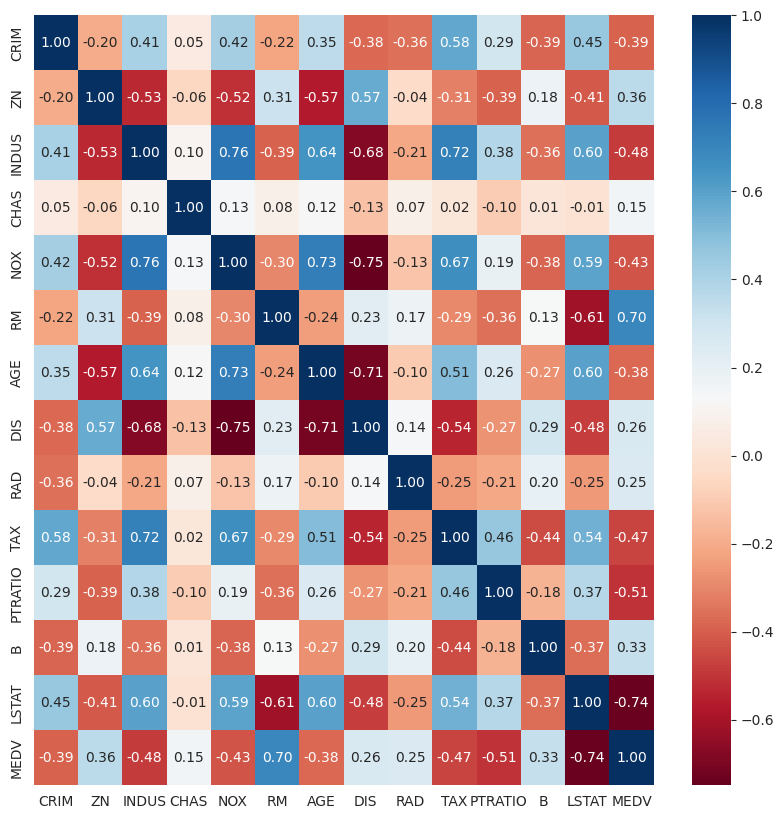

In [ ]:
# obtendo a estatítica de correlação
corr = dataset.corr()

# gerando o gráfico de 'heatmap' e plotando
fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")

# definindo os 'labels' do gráfico
plt.xticks(np.arange(len(corr.columns))+0.5, corr.columns, ha="center")
plt.yticks(np.arange(len(corr.columns))+0.5, corr.columns, va='center')

#show plot
plt.show()

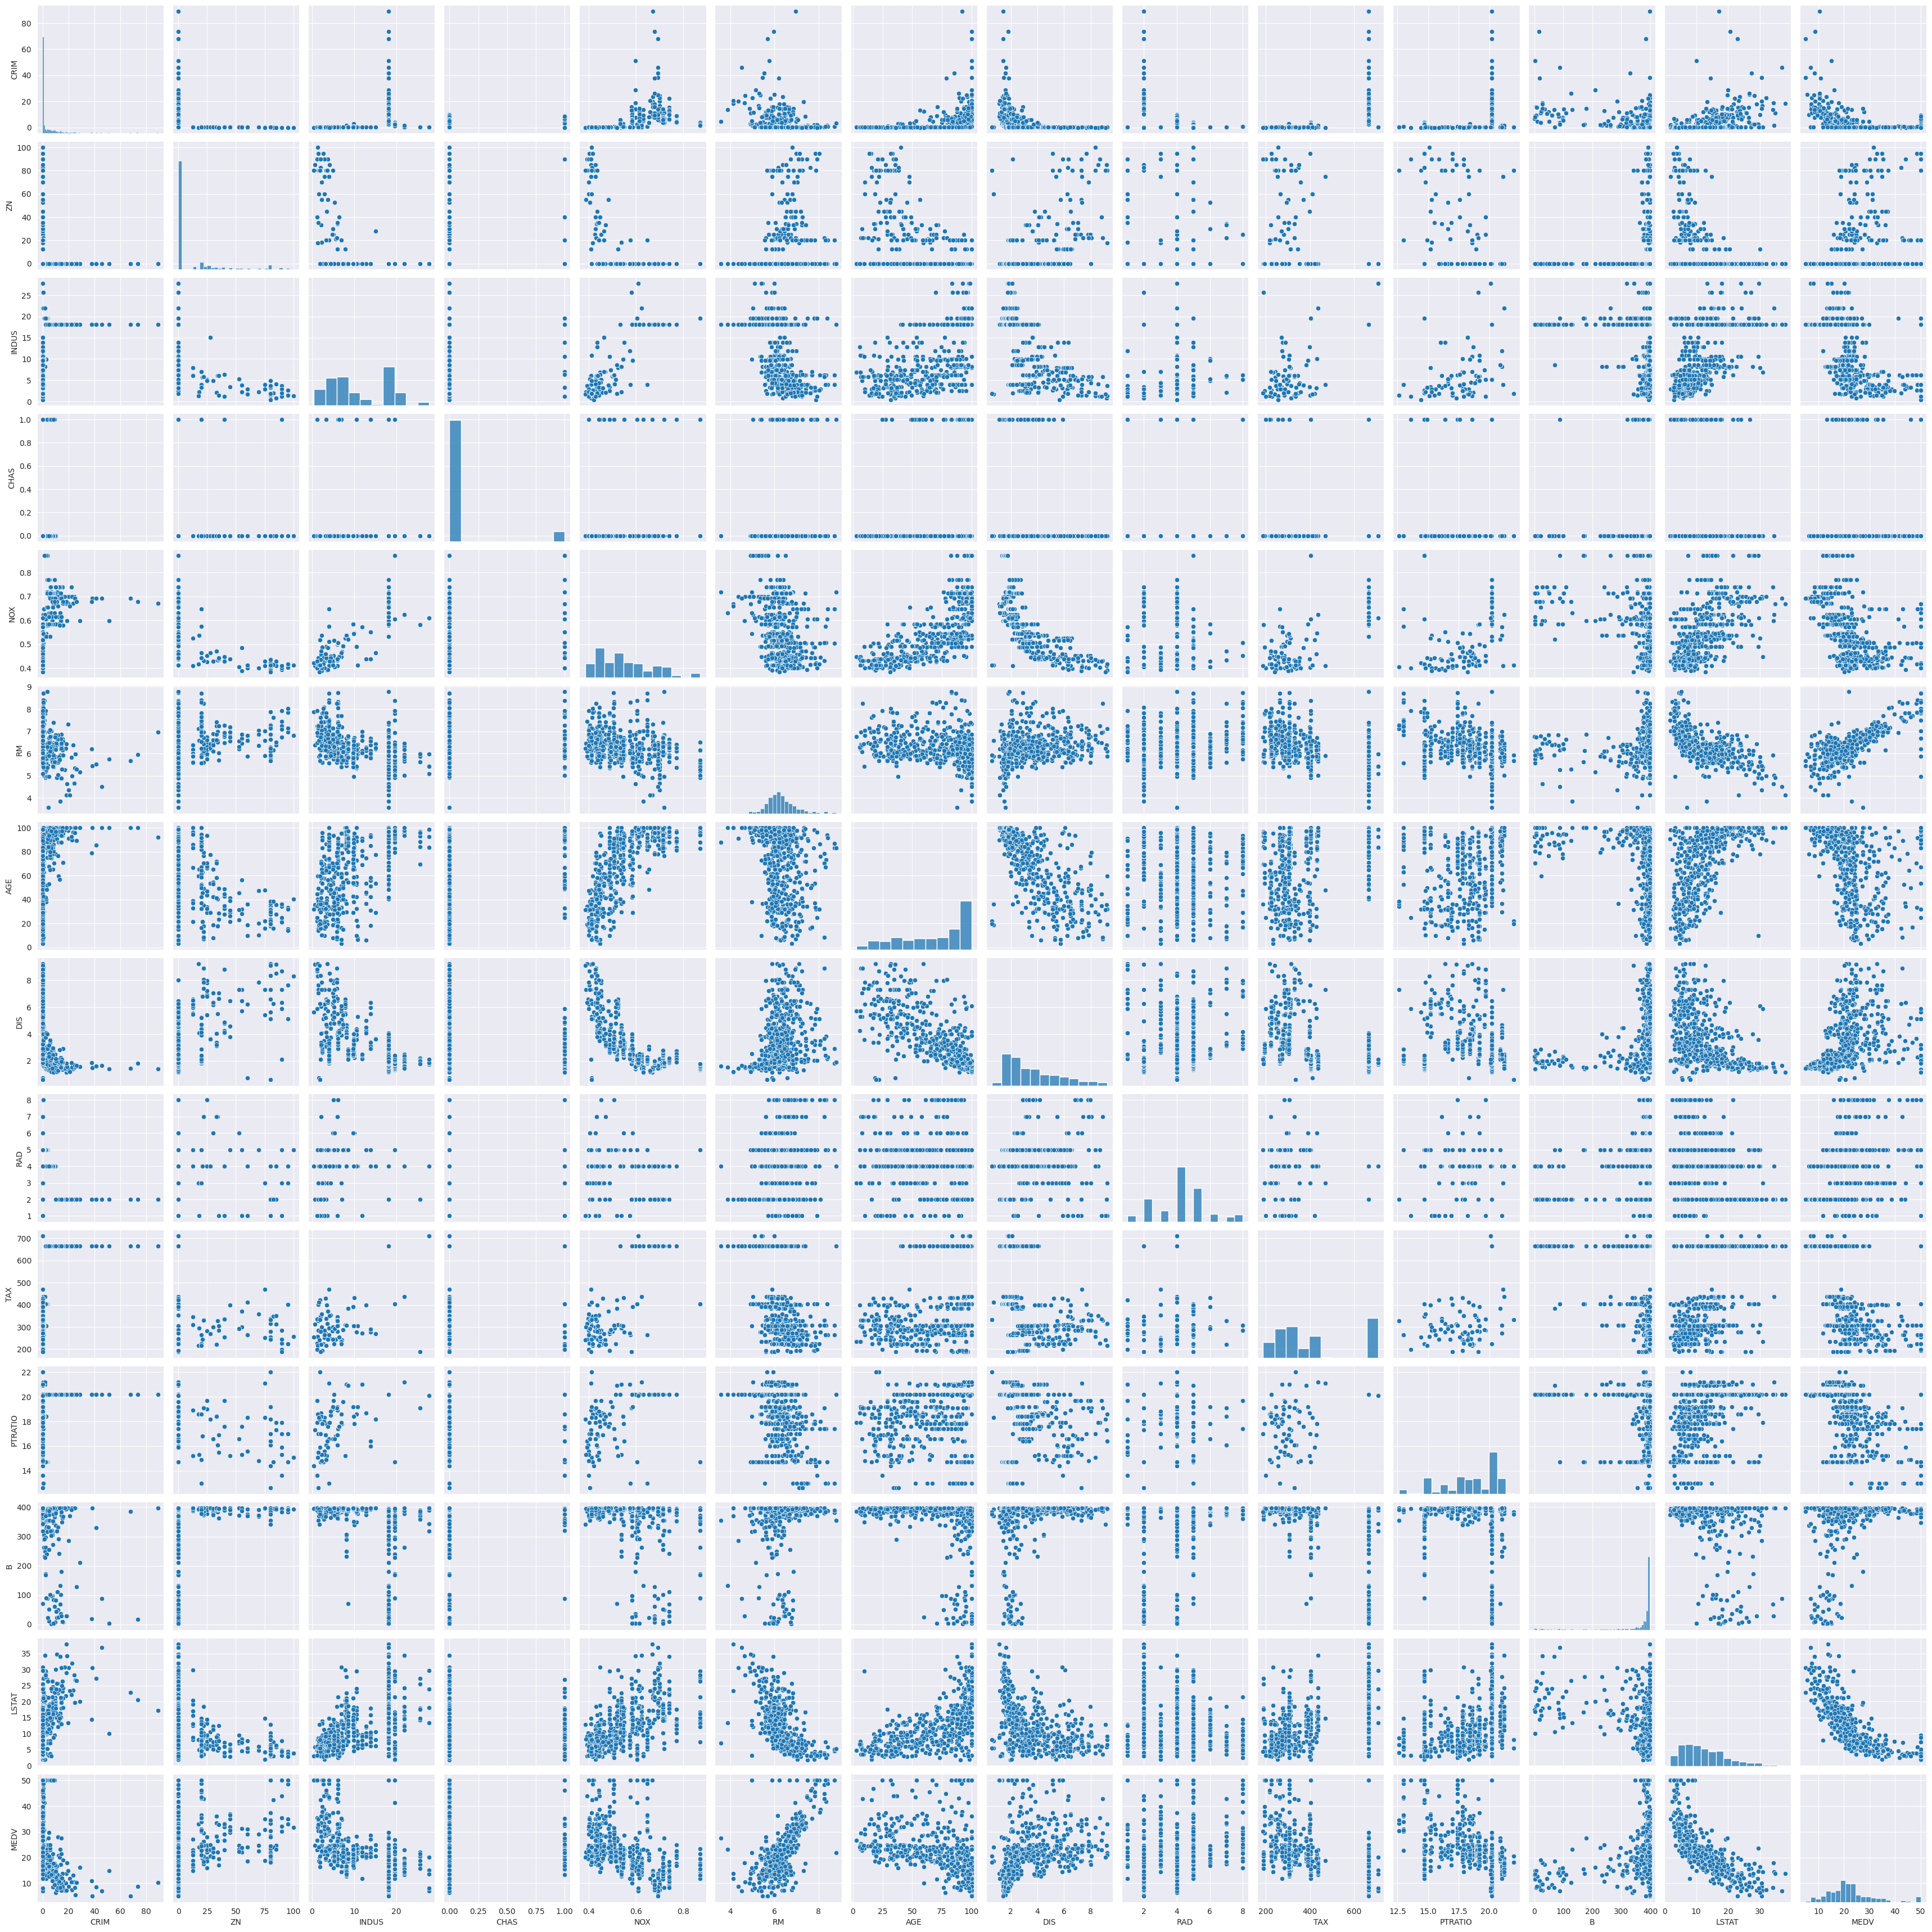

In [ ]:
sns.pairplot(dataset)
plt.show()

#3) Criando e treinando os modelos e avaliando os resultados

In [ ]:
# importando as funções de avaliação
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

Começando com o modelo LinearRegression

### Modelo Linear Regression

In [ ]:
# carregando o modelo
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()
model_1.fit(X_train, y_train)

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_1 = cross_val_score(estimator=model_1, X=X_train, y=y_train, cv=10)

ValueError: 
All the 10 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_base.py", line 609, in fit
    X, y = self._validate_data(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 650, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1301, in check_X_y
    X = check_array(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 1064, in check_array
    _assert_all_finite(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 123, in _assert_all_finite
    _assert_all_finite_element_wise(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py", line 172, in _assert_all_finite_element_wise
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values


In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_1 = model_1.predict(X_train)
r2_train_1 = r2_score(y_train, y_pred_train_1)

y_pred_test_1 = model_1.predict(X_test)
r2_test_1 = r2_score(y_test, y_pred_test_1)

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# calcular o desepenho usando RMSE
rmse_1 = (np.sqrt(mean_squared_error(y_test, y_pred_test_1)))

NameError: name 'y_pred_test_1' is not defined

In [ ]:
# exibindo os resultados
print('Modelo Linear Regression\n')
print('CV: ', cv_1.mean())
print('R2 train:', r2_train_1)
print('R2 test:', r2_test_1)
print('RMSE:', rmse_1)

Modelo Linear Regression



NameError: name 'cv_1' is not defined

### Modelo Decision Tree Regression

In [ ]:
# carregando o modelo
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_2 = DecisionTreeRegressor()
model_2.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_2 = cross_val_score(estimator=model_2, X=X_train, y=y_train, cv=10)

In [ ]:
# calcular o desempenho usando a métrica r2
y_pred_train_2 = model_2.predict(X_train)
r2_train_2 = r2_score(y_train, y_pred_train_2)

y_pred_test_2 = model_2.predict(X_test)
r2_test_2 = r2_score(y_test, y_pred_test_2)

In [ ]:
# calcular o desepenho usando RMSE
rmse_2 = (np.sqrt(mean_squared_error(y_test, y_pred_test_2)))

In [ ]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_2.mean())
print('R2 train:', r2_train_2)
print('R2 test:', r2_test_2)
print('RMSE:', rmse_2)

Modelo DecisionTreeRegression

CV:  0.7880403561193489
R2 train: 1.0
R2 test: 0.48079089358911664
RMSE: 7.069006667358427


### Modelo Polynomial Regression de 2 ordem

In [ ]:
# carregando o modelo
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)

model_3 = LinearRegression()
model_3.fit(X_poly, y_train)

ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
print(X_train.shape)

(354, 13)


In [ ]:
print(X_poly.shape)

NameError: name 'X_poly' is not defined

In [ ]:
# avaliar o desempenho de acurácia usando o cross-validation
cv_3 = cross_val_score(estimator=model_3, X=X_poly, y=y_train, cv=10)

# calcular o desempenho usando a métrica r2
y_pred_train_3 = model_3.predict(X_poly)
r2_train_3 = r2_score(y_train, y_pred_train_3)

y_pred_test_3 = model_3.predict(poly_reg.fit_transform(X_test))
r2_test_3 = r2_score(y_test, y_pred_test_3)

# calcular o desepenho usando RMSE
rmse_3 = (np.sqrt(mean_squared_error(y_test, y_pred_test_3)))

NameError: name 'model_3' is not defined

In [ ]:
# exibindo os resultados
print('Modelo DecisionTreeRegression\n')
print('CV: ', cv_3.mean())
print('R2 train:', r2_train_3)
print('R2 test:', r2_test_3)
print('RMSE:', rmse_3)

Modelo DecisionTreeRegression



NameError: name 'cv_3' is not defined

#4) Comparando o desempenho

In [ ]:
# medindo o erro

models = [('Linear Regression', rmse_1, r2_train_1, r2_test_1, cv_1.mean()),
          ('Decision Tree Regression', rmse_2, r2_train_2, r2_test_2, cv_2.mean()),
          ('Polynomial Regression (2nd)', rmse_3, r2_train_3, r2_test_3, cv_3.mean()),
         ]

NameError: name 'rmse_1' is not defined

In [ ]:
predict = pd.DataFrame(data = models, columns=['Model', 'RMSE', 'R2_Score(train)', 'R2_Score(test)', 'Cross-Validation'])
predict

In [ ]:
# visualizanto como gráfico

f, axe = plt.subplots(1,1, figsize=(18,6))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
plt.show()

In [ ]:
f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['R2_Score(train)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(train)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('R2 Score (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)

predict.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
axes[1].set_xlabel('R2 Score (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)

plt.show()

In [ ]:
predict.sort_values(by=['RMSE'], ascending=False, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,6))
sns.barplot(x='Model', y='RMSE', data=predict, ax = axe)
axe.set_xlabel('Model', size=16)
axe.set_ylabel('RMSE', size=16)

plt.show()